In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl
import xarray as xr
import boutdata

from boutdata.restart import addvar
import glob
import shutil

import scipy

sys.path.append(r"C:\Users\mikek\OneDrive\Project\python-packages\sdtools")


from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from cli.cmonitor import *
# from code_comparison.code_comparison import *


%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# IO

In [2]:
db = CaseDB(
    # case_dir = r"/ssd_scratch/hcases",
    # grid_dir = r"/ssd_scratch/hcases"
    )

toload = [ 
    dict(name="ortho", id="d42a-d40db_mfp1_braginskiifix_newmaster", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="nonortho", id="d42acb-with_guards", unnormalise_geom = True, use_xhermes = True, squash = True), 
    
    dict(name="nonort_master_lores", id="t9a-nonortho_xpoint_master", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="nonort_afn_lores", id="t9b-nonortho_xpoint_afn", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="master_lores", id="t2a-base_steady_master", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="afn_lores", id="t1a-base_steady", unnormalise_geom = True, use_xhermes = True, squash = True), 
    
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)


- Reading case d42a-d40db_mfp1_braginskiifix_newmaster
-----------------------
- Looking for squash file
- Squash file found. squash date 09/03/2024, 10:47:52, dmp file date 09/03/2024, 10:39:56

Unnormalising with xHermes
- Reading case d42acb-with_guards
-----------------------
- Looking for squash file
- Squash file found. squash date 09/03/2024, 10:49:23, dmp file date 09/03/2024, 10:28:10


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1138: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case t9a-nonortho_xpoint_master
-----------------------
- Looking for squash file
- Squashoutput file not found, creating...
- Done


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1138: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case t9b-nonortho_xpoint_afn
-----------------------
- Looking for squash file
- Squash file found. squash date 08/29/2024, 16:13:14, dmp file date 09/03/2024, 12:28:50
- dmp files are newer than the squash file! Recreating...
- Done


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1138: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case t2a-base_steady_master
-----------------------
- Looking for squash file
- Squash file found. squash date 08/29/2024, 16:14:21, dmp file date 08/22/2024, 21:00:51


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1138: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case t1a-base_steady
-----------------------
- Looking for squash file
- Squash file found. squash date 08/23/2024, 19:06:43, dmp file date 08/20/2024, 16:35:00


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1138: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes


# Compare master lo res

In [6]:
cs.keys()

dict_keys(['nonort_master_lores', 'nonort_afn_lores', 'master_lores', 'afn_lores'])

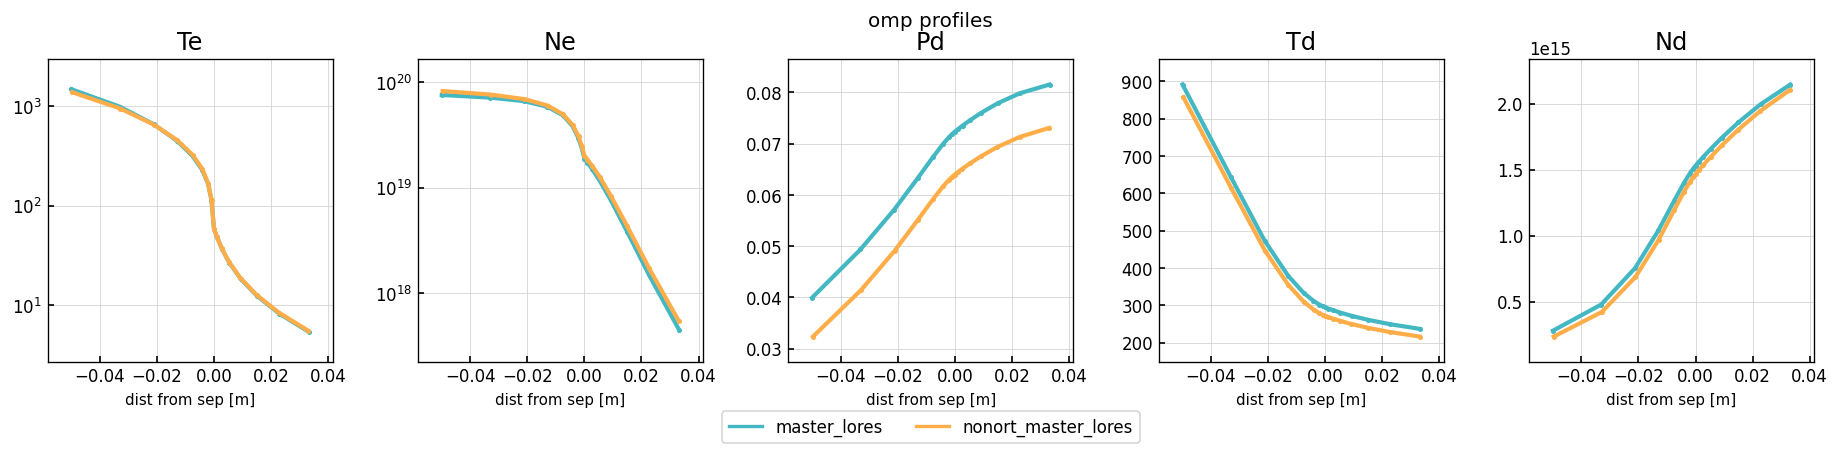

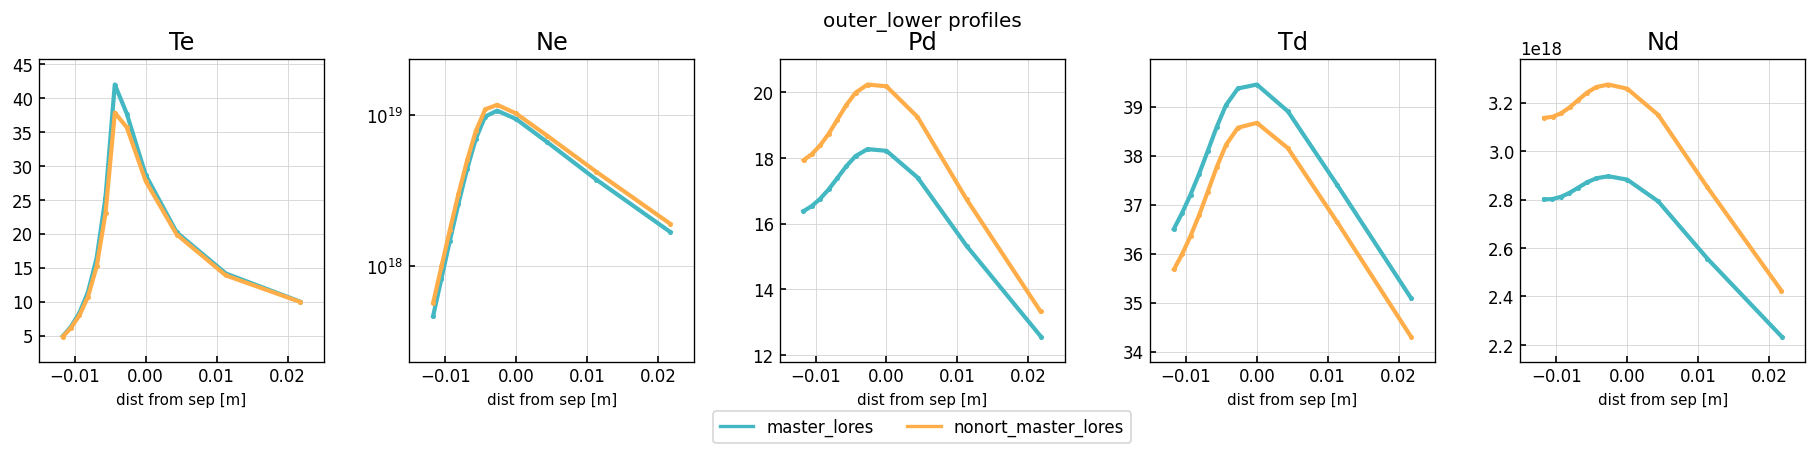

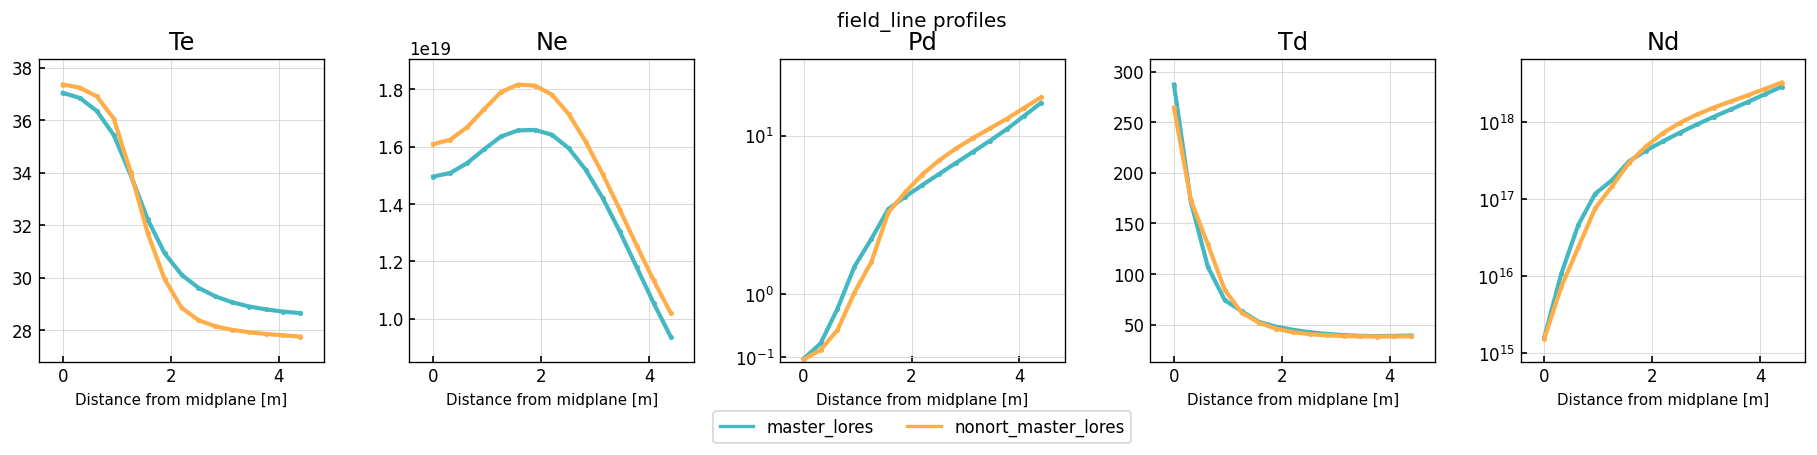

In [12]:
toplot = {}
# for case in cs:
for case in ["master_lores", "nonort_master_lores"]:
# for case in ["test_legacy", "test_afn"]:

    ds = cs[case].ds
    if "t" in ds.dims: ds = ds.isel(t=-1)
    toplot[case] = ds.isel(x = slice(2,-2))
    
lineplot(
    toplot,
    clean_guards = False,
    logscale = True,
    params = ["Te", "Ne", "Pd", "Td", "Nd"],
    # params = ["Te"],
    # params = ["Nd", "Dnnd"],
    regions = ["omp", "outer_lower", "field_line"],
    lw = 2.5,
    log_threshold = 20
)

# Compare AFN lo res

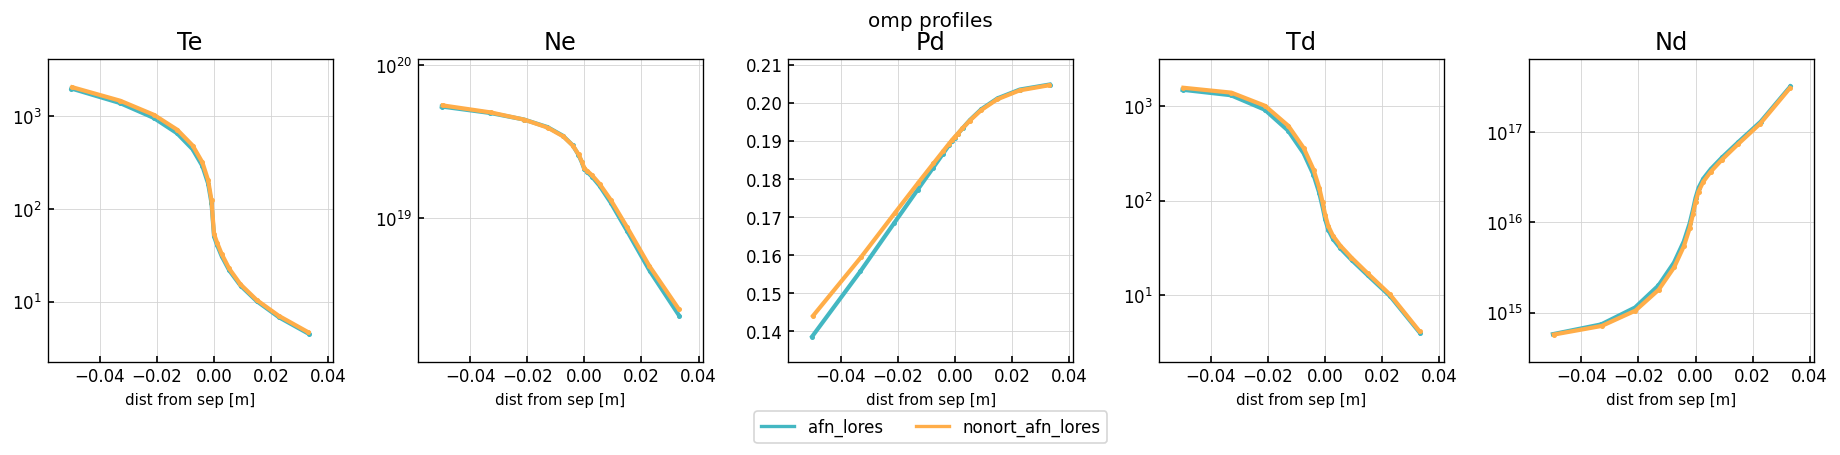

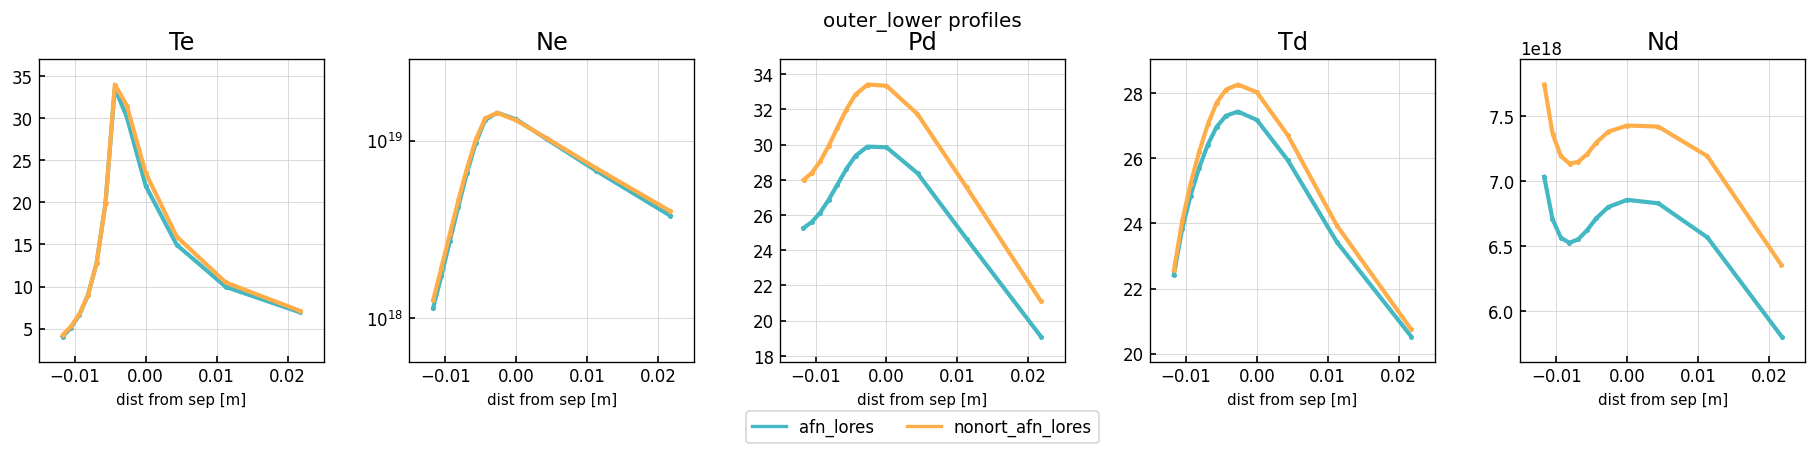

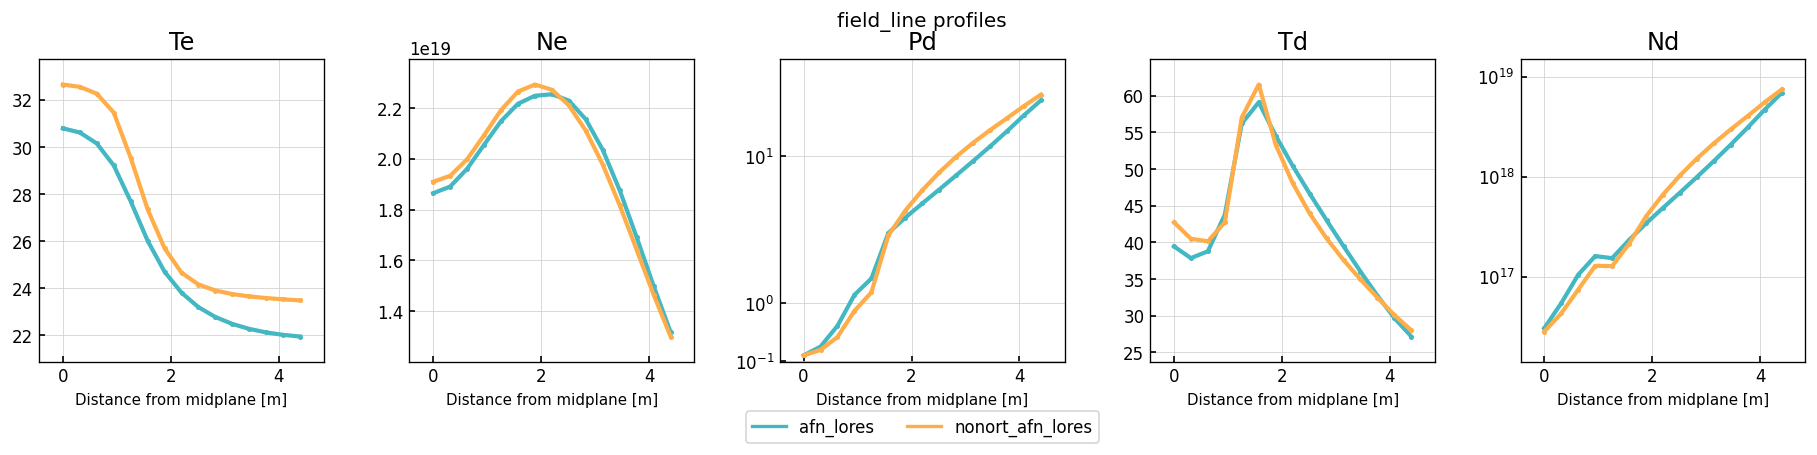

In [11]:
toplot = {}
for case in ["afn_lores", "nonort_afn_lores"]:
# for case in ["test_legacy", "test_afn"]:

    ds = cs[case].ds
    if "t" in ds.dims: ds = ds.isel(t=-1)
    toplot[case] = ds.isel(x = slice(2,-2))
    
lineplot(
    toplot,
    clean_guards = False,
    logscale = True,
    params = ["Te", "Ne", "Pd", "Td", "Nd"],
    # params = ["Nd", "Dnnd"],
    regions = ["omp", "outer_lower", "field_line"],
    lw = 2.5,
)

# Compare AFN hi res

In [16]:
cs.keys()

dict_keys(['ortho', 'nonortho', 'nonort_master_lores', 'nonort_afn_lores', 'master_lores', 'afn_lores'])

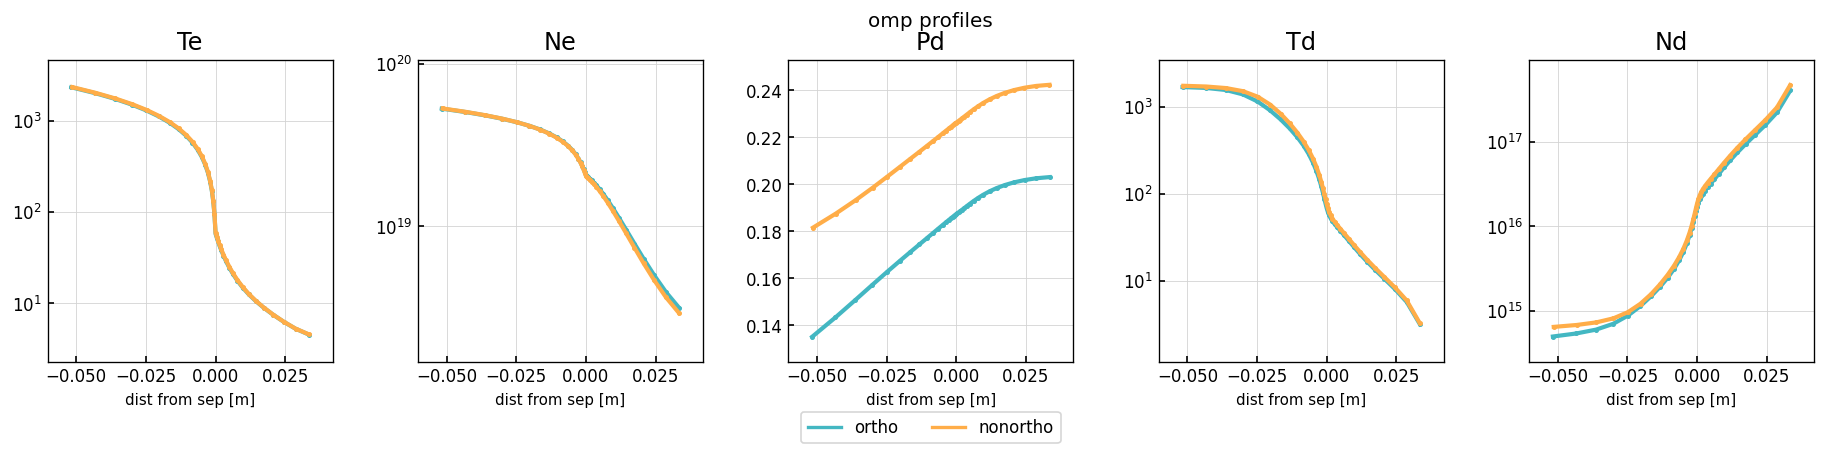

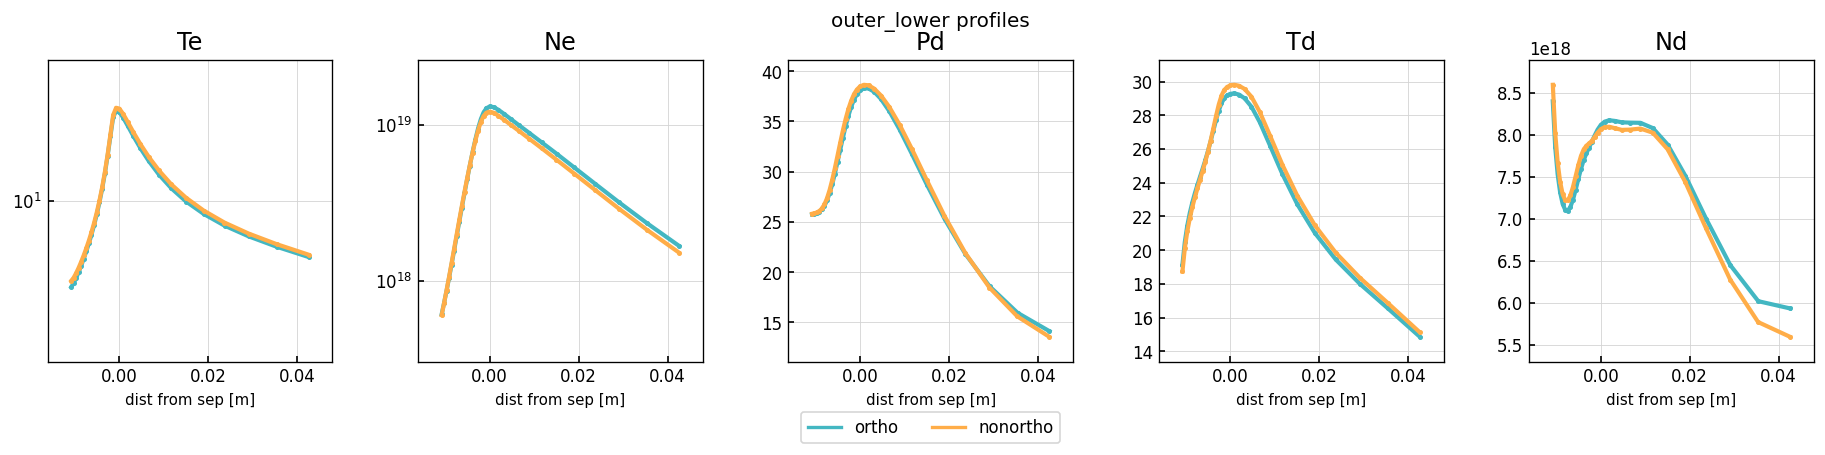

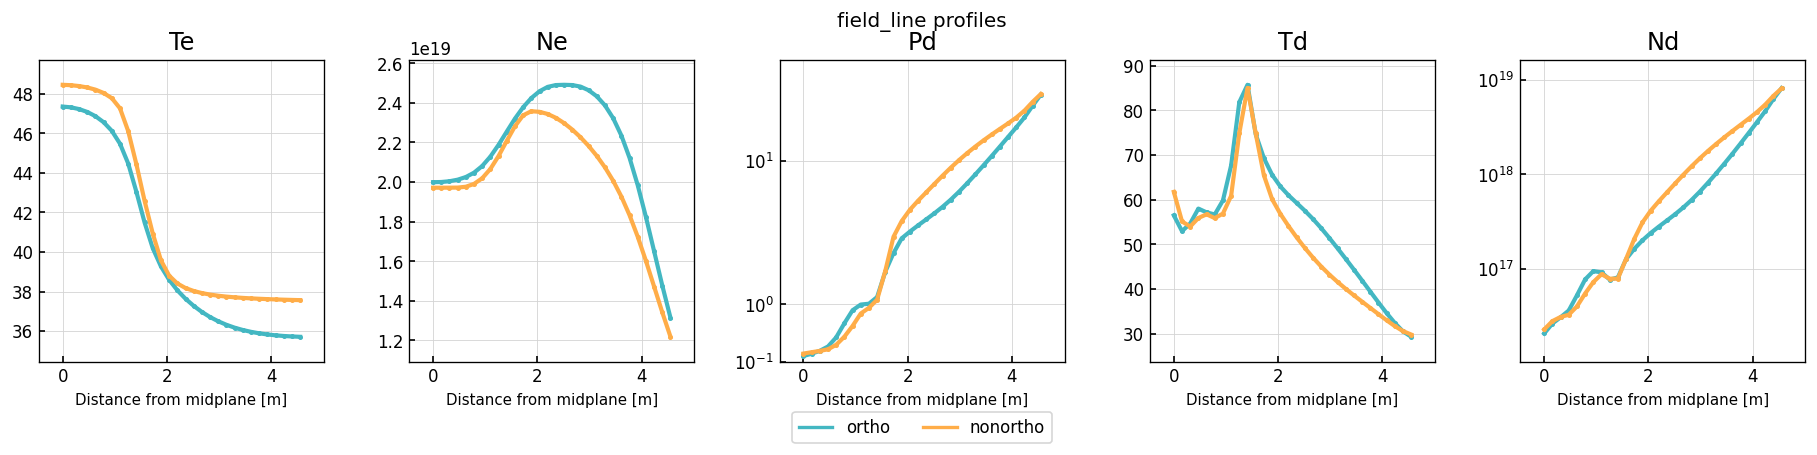

In [17]:
toplot = {}
for case in ["ortho", "nonortho"]:
# for case in ["test_legacy", "test_afn"]:

    ds = cs[case].ds
    if "t" in ds.dims: ds = ds.isel(t=-1)
    toplot[case] = ds.isel(x = slice(2,-2))
    
lineplot(
    toplot,
    clean_guards = False,
    logscale = True,
    params = ["Te", "Ne", "Pd", "Td", "Nd"],
    # params = ["Nd", "Dnnd"],
    regions = ["omp", "outer_lower", "field_line"],
    lw = 2.5,
)

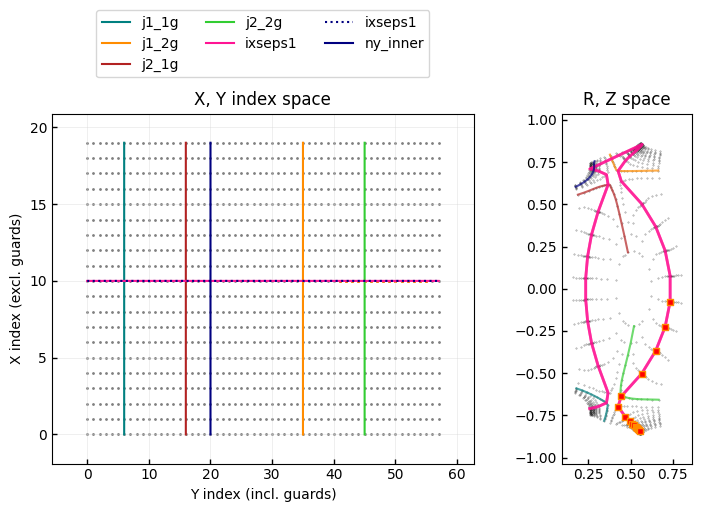

In [10]:
plot_selection(ds, ds.hermesm.select_custom_sol_ring(ds.metadata["ixseps1"]-1, "outer_lower"))

# Performance

In [13]:
cs.keys()

dict_keys(['ortho', 'nonortho', 'nonort_master_lores', 'nonort_afn_lores', 'master_lores', 'afn_lores'])

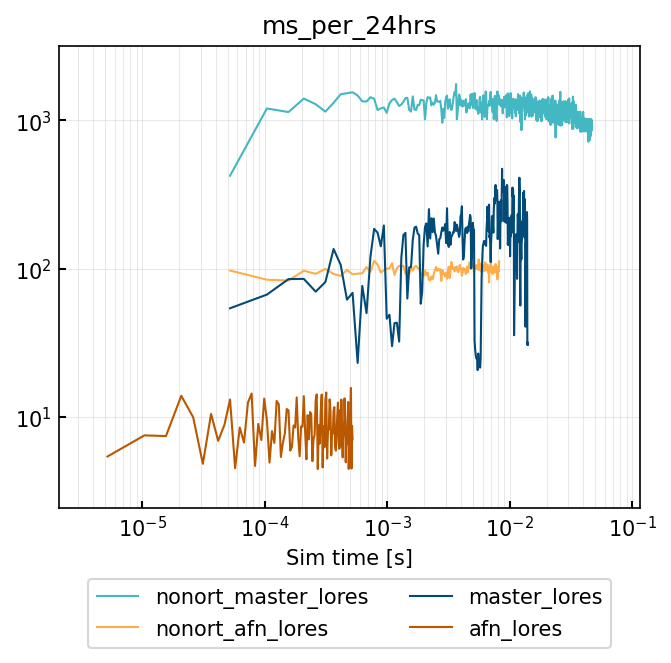

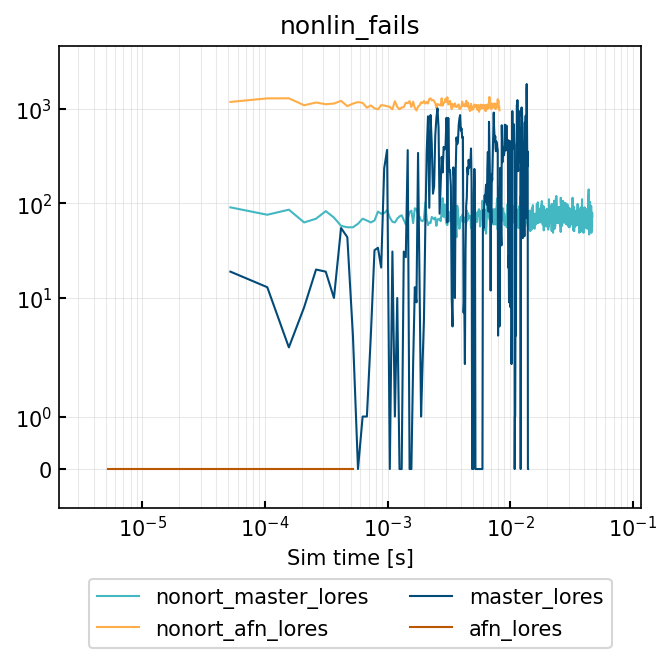

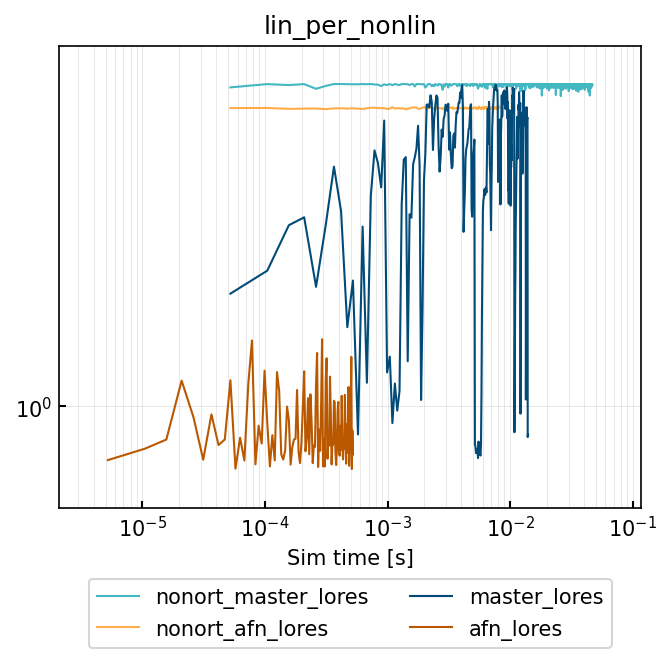

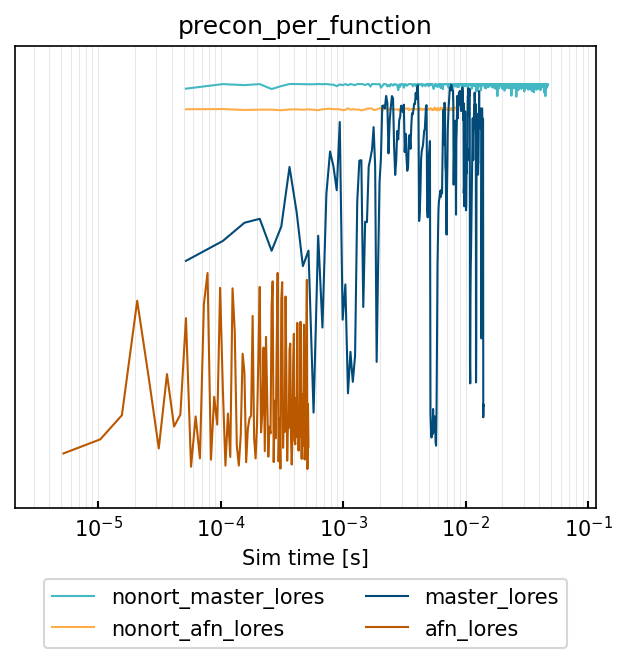

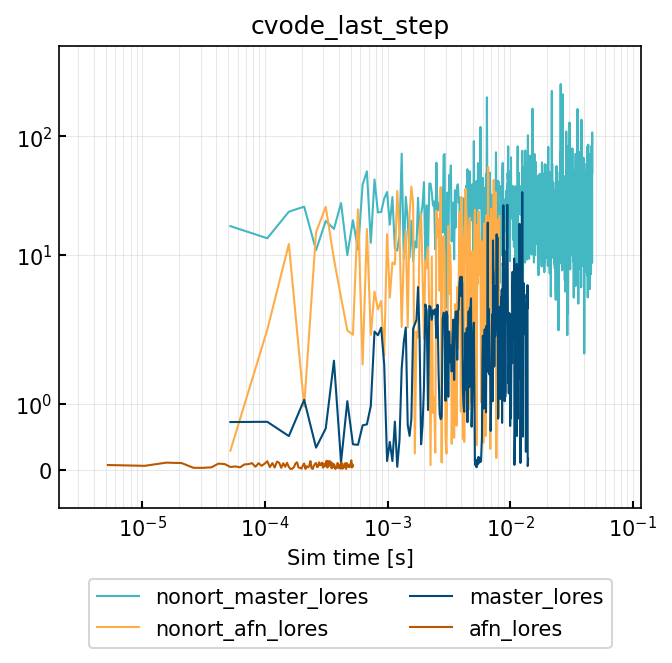

In [15]:
dict_ds = {}
[dict_ds.update({name: cs[name].ds}) for name in ['nonort_master_lores', 'nonort_afn_lores', 'master_lores', 'afn_lores']]
plot_cvode_performance(dict_ds, logscale = True)

# Timescales

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


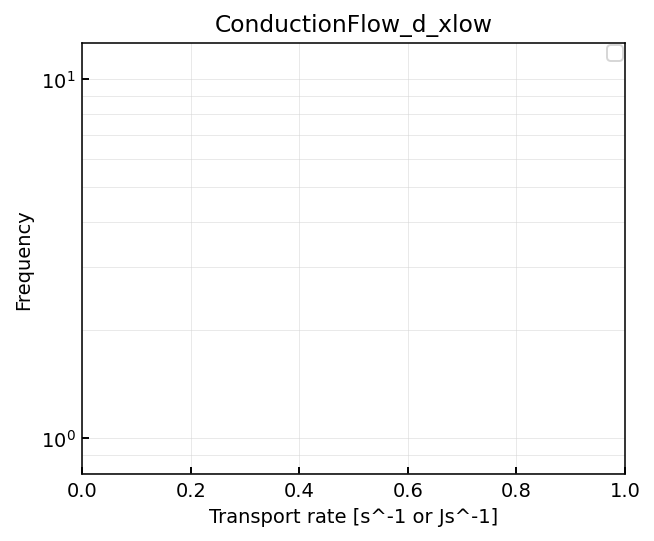

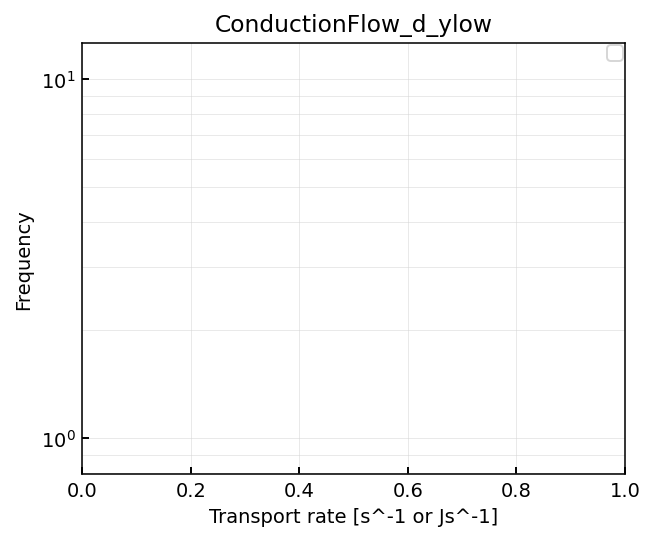

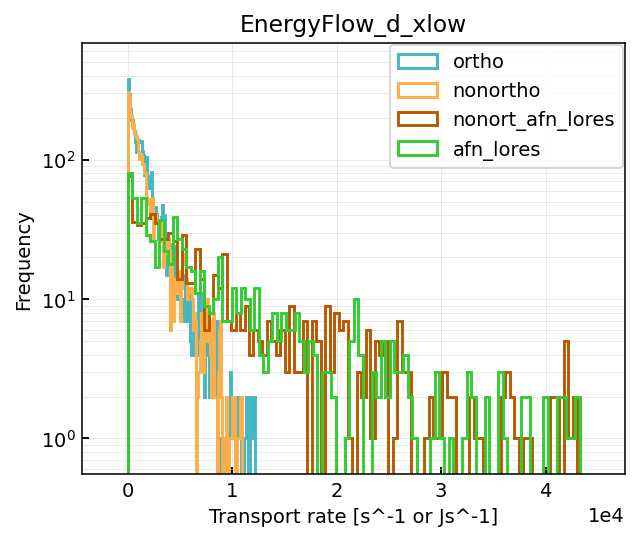

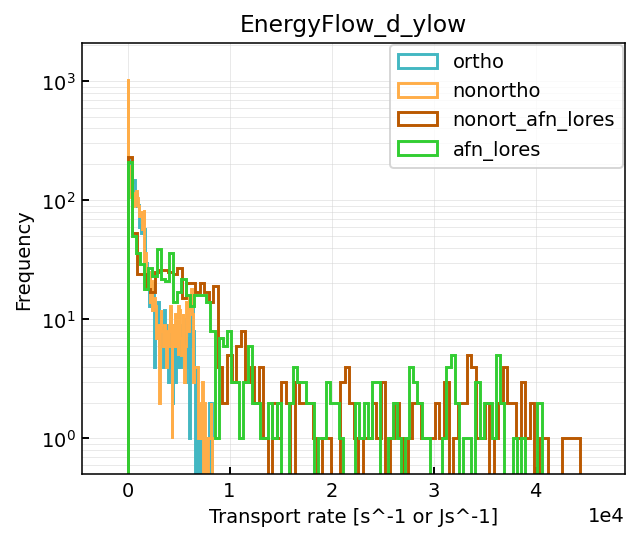

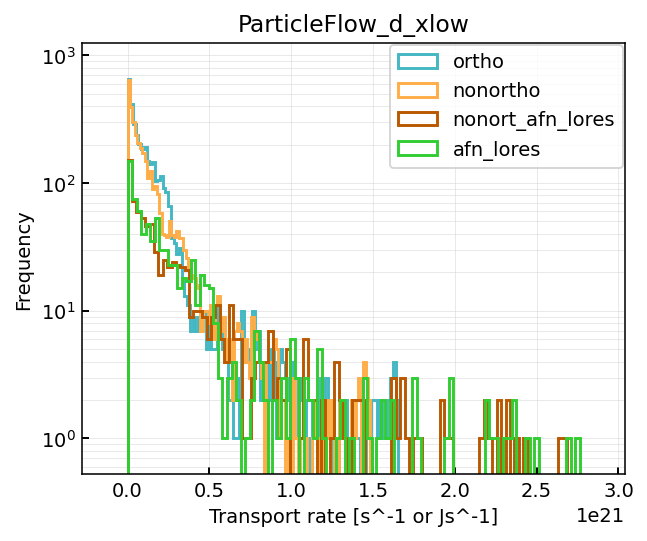

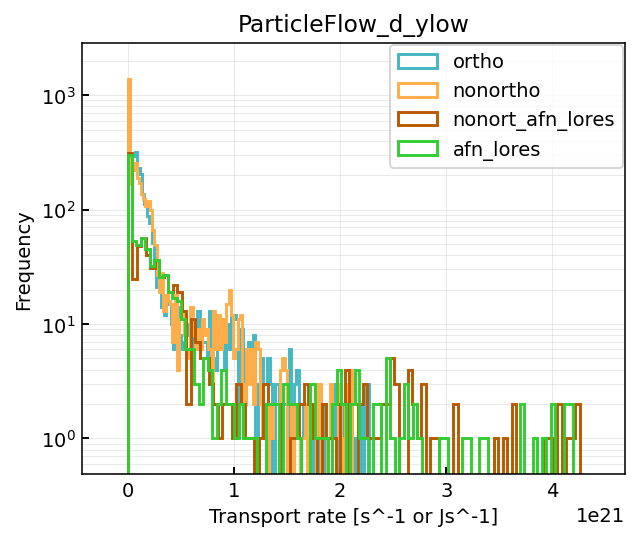

In [18]:


colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# nx = 6
# ny = 1
# fig, axes = plt.subplots(ny, nx, figsize = (3*nx, 3*ny))



for j, param in enumerate(["ConductionFlow_d_xlow", "ConductionFlow_d_ylow", "EnergyFlow_d_xlow", "EnergyFlow_d_ylow", "ParticleFlow_d_xlow", "ParticleFlow_d_ylow"]):

    fig, ax = plt.subplots()
    ax.set_title(param)
    ax.set_xlabel("Transport rate [s^-1 or Js^-1]")
    ax.set_ylabel("Frequency")

    for i, case in enumerate(cs):
        ds = cs[case].ds.isel(t=-1)

        if param in ds:
            n, bins, patches = ax.hist(
                x = abs(ds[param].hermesm.clean_guards().values.flatten()),
                bins = 100, alpha = 1, rwidth = 0.85, lw = 1.5, histtype = "step", color = colors[i], ls = "-",  label = f"{case}")

    ax.legend()
    ax.set_yscale("log")